In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import string
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
# View the dataframe information
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
None


In [4]:
# View dataframe statistical summary
print(reviews_df.describe())

            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000


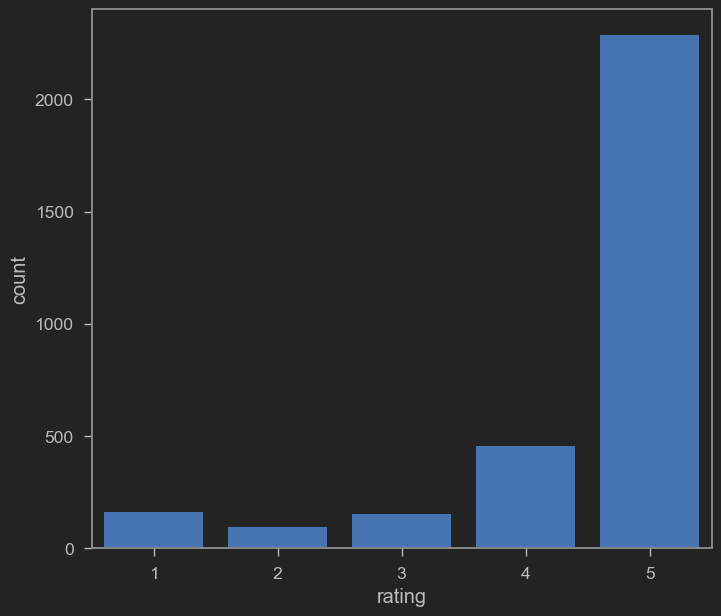

In [5]:
# Plot the count plot for the ratings
sns.countplot(x=reviews_df['rating'])
plt.show()

In [6]:
## Replace NaN with an empty string
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].fillna('')

# Length of each entry of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<Axes: ylabel='Frequency'>

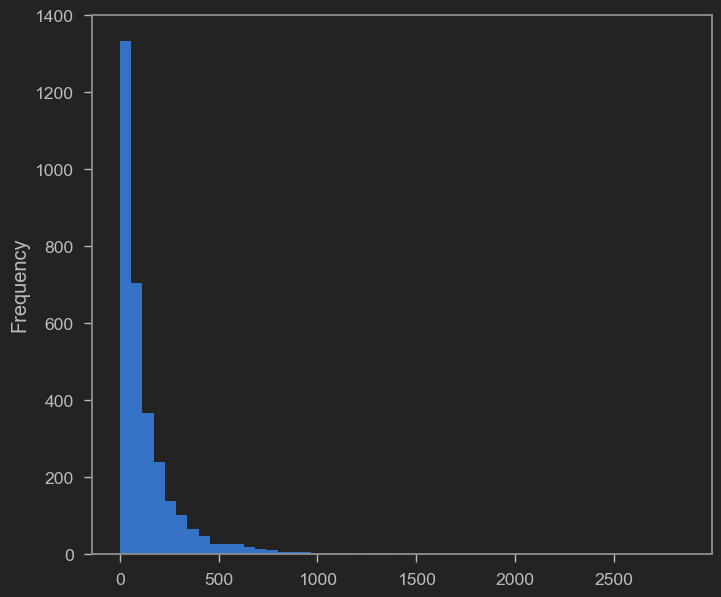

In [7]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=50, kind='hist')

In [8]:
# Get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.048254
std,1.068506,0.273778,182.100859
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


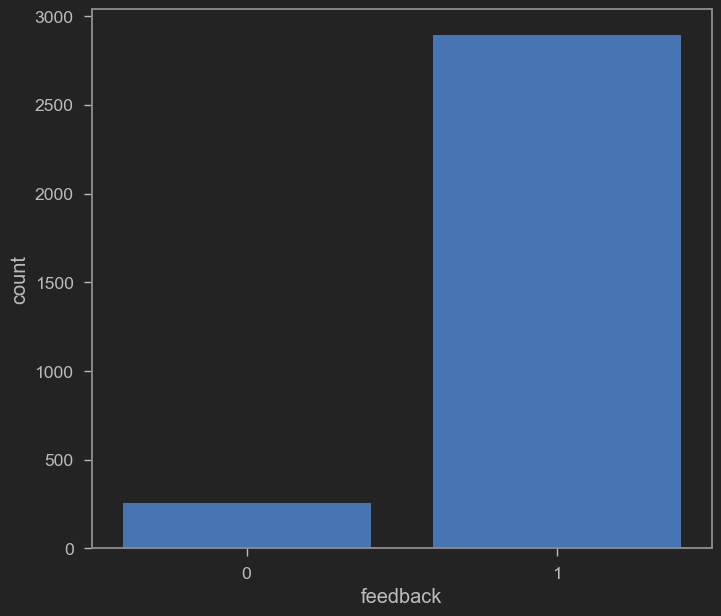

In [9]:
# Plot countplot for feedback
sns.countplot(x = reviews_df['feedback'])
plt.show()

In [11]:
# Creating the wordcloud
positive = reviews_df[reviews_df['feedback'] == 1]
positive

negative = reviews_df[reviews_df['feedback'] == 0]
negative

#sentences = positive['verified_reviews'].tolist()
#sentences
#len(sentences)

# Preparing the text data
sentences = reviews_df['verified_reviews'].tolist()
sentences_as_huge_string = ''.join(sentences)


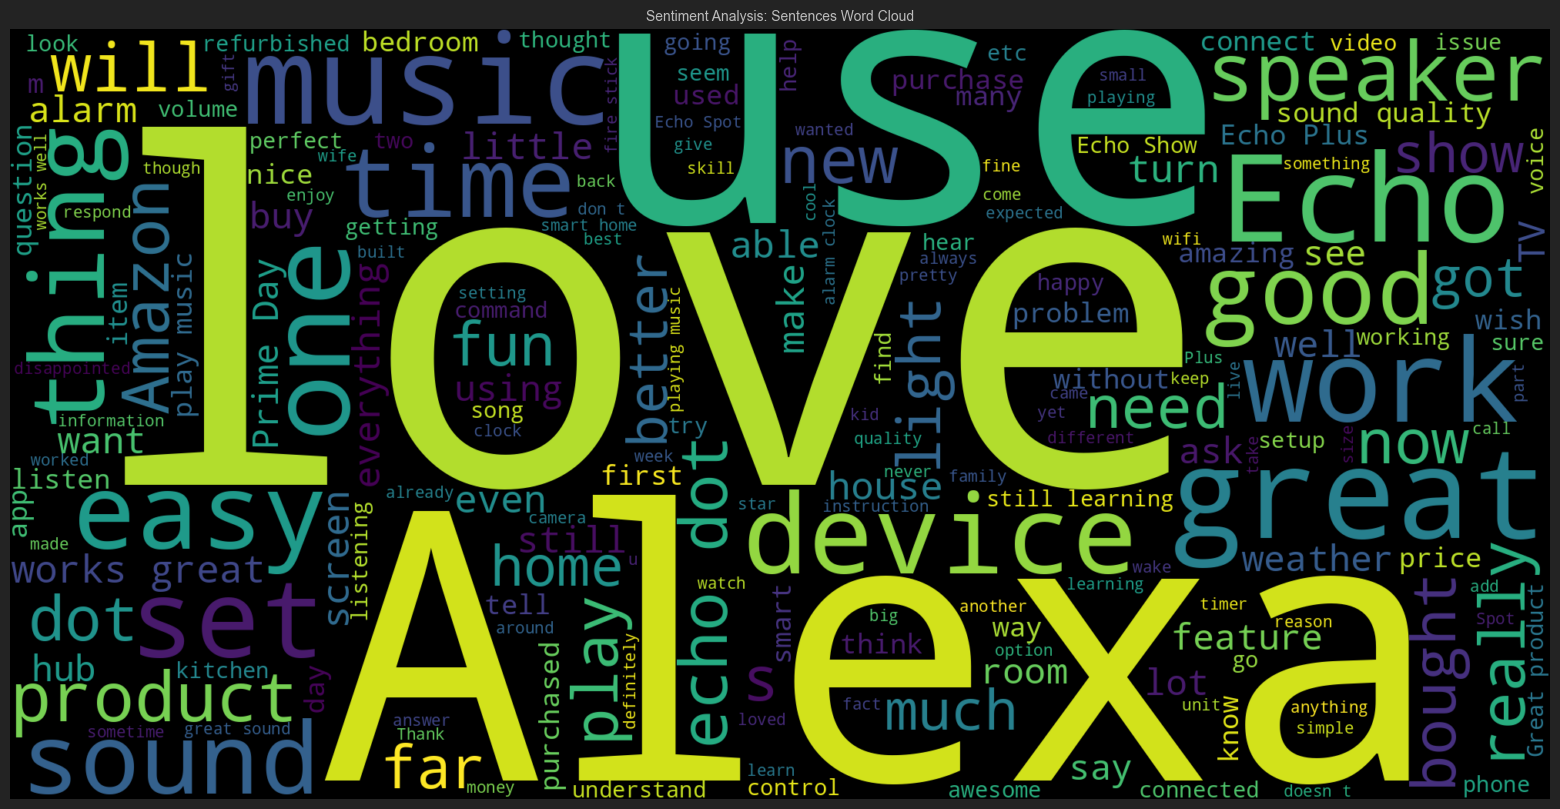

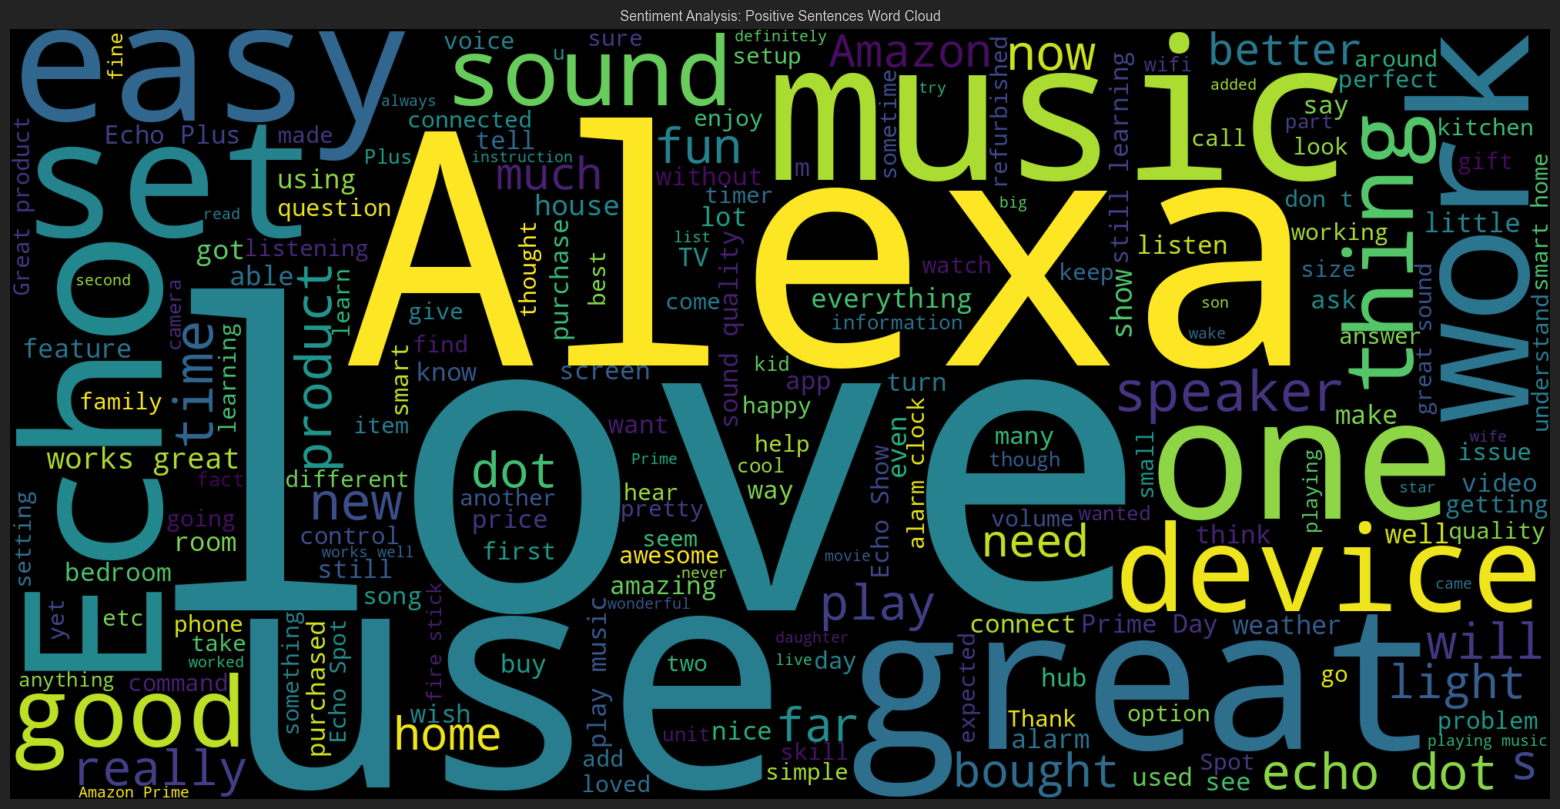

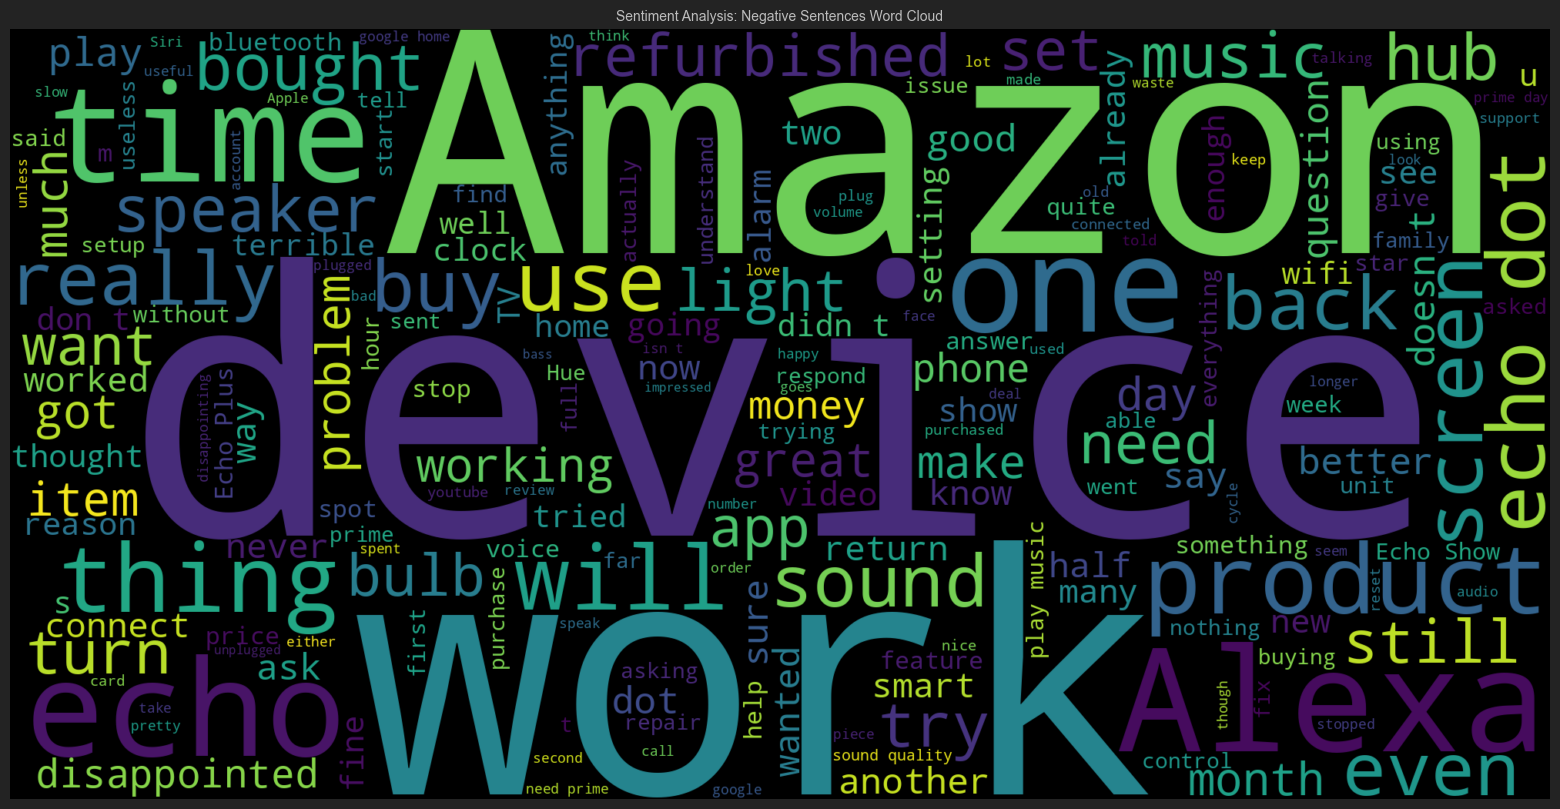

In [12]:
from wordcloud import WordCloud

wordcloud_sentences = WordCloud(width=2000, height=1000).generate(sentences_as_huge_string)
wordcloud_positive = WordCloud(width=2000, height=1000).generate(''.join(reviews_df[reviews_df['feedback'] == 1]['verified_reviews'].tolist()))
wordcloud_negative = WordCloud(width=2000, height=1000).generate(''.join(reviews_df[reviews_df['feedback'] == 0]['verified_reviews'].tolist()))

# List of worldcloud instances
wordclouds = [
    (wordcloud_sentences, 'Sentiment Analysis: Sentences Word Cloud'),
    (wordcloud_positive, 'Sentiment Analysis: Positive Sentences Word Cloud'),
    (wordcloud_negative, 'Sentiment Analysis: Negative Sentences Word Cloud')
]

# Word clouds plots
for i, (wordcloud, title) in enumerate(wordclouds):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=10)
    plt.show(block=False)  # Non-blocking display

plt.show()  # Ensure all figures are shown

In [13]:
import string, nltk # Natural Languaje Toolkit
nltk.download('stopwords')
from nltk.corpus import stopwords

def message_cleaning(message):
    
    message_punc_cleaned = [char for char in message if char not in string.punctuation]
    message_punc_cleaned = ''.join(message_punc_cleaned)

    message_stopw_cleaned = [word for word in message_punc_cleaned.split() if word.lower() not in stopwords.words('english')]

    return message_stopw_cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/multivac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Apply the cleaning func
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)


In [15]:
# Compare
print(f'Original review: '+reviews_df['verified_reviews'][5])
print(f'Cleaned review: {reviews_df_clean.loc[:][5]}')

Original review: I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
Cleaned review: ['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
# Apply the pipeline
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

<3150x5211 sparse matrix of type '<class 'numpy.int64'>'
	with 37627 stored elements in Compressed Sparse Row format>

In [24]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [19]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
reviews_countvectorizer.shape

(3150, 5211)

In [21]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
X = reviews

In [26]:
Y = reviews_df['feedback']
Y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split #standard process whenever we train an AI or ML model
#we train with 80% of the data, the performance is assest in an unbiased way using new data never seen before (20%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [28]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, Y_train)

MultinomialNB()

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

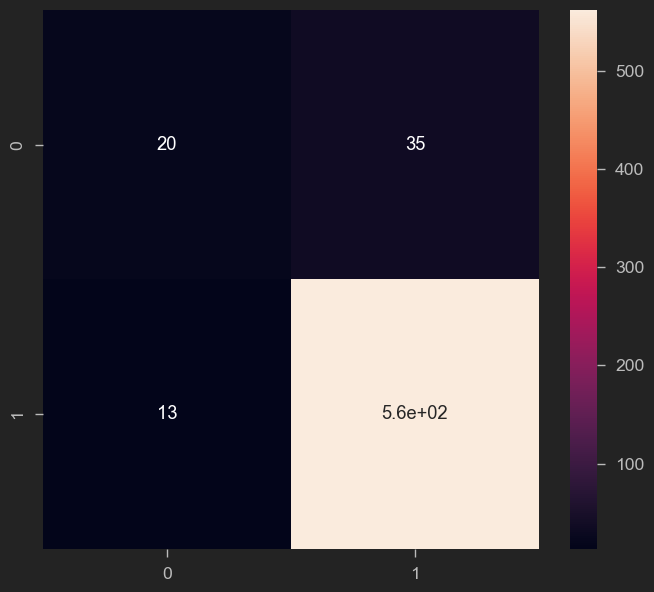

In [30]:
# Predicting the Test set results
Y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(cm, annot=True)
plt.show()

In [31]:
print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           0       0.61      0.36      0.45        55
           1       0.94      0.98      0.96       575

    accuracy                           0.92       630
   macro avg       0.77      0.67      0.71       630
weighted avg       0.91      0.92      0.92       630



In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

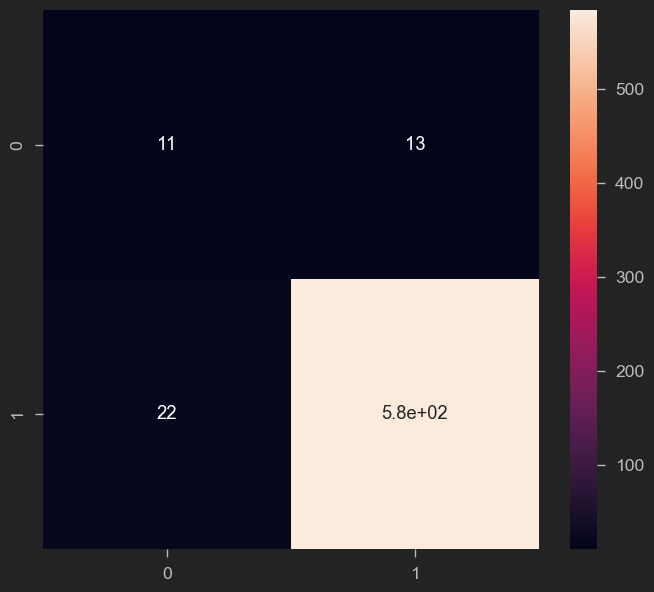

In [34]:
# Predicting the Test set results
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_pred, Y_predict_test)
sns.heatmap(cm, annot=True)
plt.show()

In [35]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.31      0.43        55
           1       0.94      0.99      0.96       575

    accuracy                           0.93       630
   macro avg       0.82      0.65      0.70       630
weighted avg       0.92      0.93      0.92       630



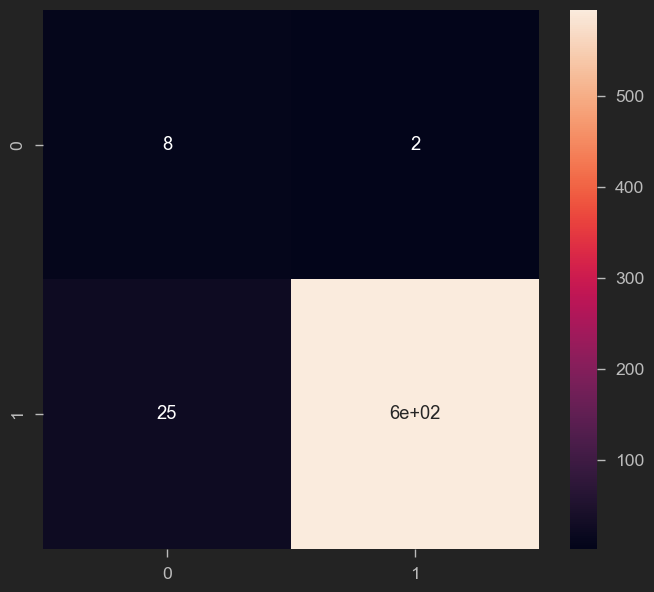

              precision    recall  f1-score   support

           0       0.90      0.16      0.28        55
           1       0.93      1.00      0.96       575

    accuracy                           0.93       630
   macro avg       0.91      0.58      0.62       630
weighted avg       0.92      0.93      0.90       630



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred_Gradient = model.predict(X_test)
cm = confusion_matrix(Y_pred_Gradient, Y_predict_test)
sns.heatmap(cm, annot=True)
plt.show()

print(classification_report(Y_test, Y_pred_Gradient))